In [42]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:brown', \
           'tab:grey', 'tab:olive', 'tab:olive', 'tab:cyan', 'lime', 'navy', 'fuchsia', 'm']

## Triadic Census
Note that the triadic census for the groups (such as *Liberal + Libertarian* and *Overall*) were obtained by generating a network with all nodes/edges in the included subreddits; not simply by combining the triadic censes of the individual subreddits.

In [43]:
df = pd.read_csv('results/reddit_reply.csv',index_col=0)
dims = pd.read_csv('dimensions.csv',index_col=0).apply(pd.eval)
print(df)

                                                         003           012  \
Anarchism                                        25566099088      76196181   
Anarcho_Capitalism                               26918538411     151526883   
Anarchy101                                         177929528       1608735   
Conservative                                    130287313352     223525242   
conservatives                                       70388158        492631   
Liberal                                           1952278394       7847156   
Libertarian                                     810924089438     980435790   
politics                                     286317476272647   65768807965   
Republican                                         775785240       3655098   
socialism                                        56601538962     148415024   
Anarchism + Anarcho_Capitalism + Anarchy101     189610736722     461651523   
Conservative + conservatives                    150236958128    

## Triadic Census Plot

<IPython.core.display.Javascript object>


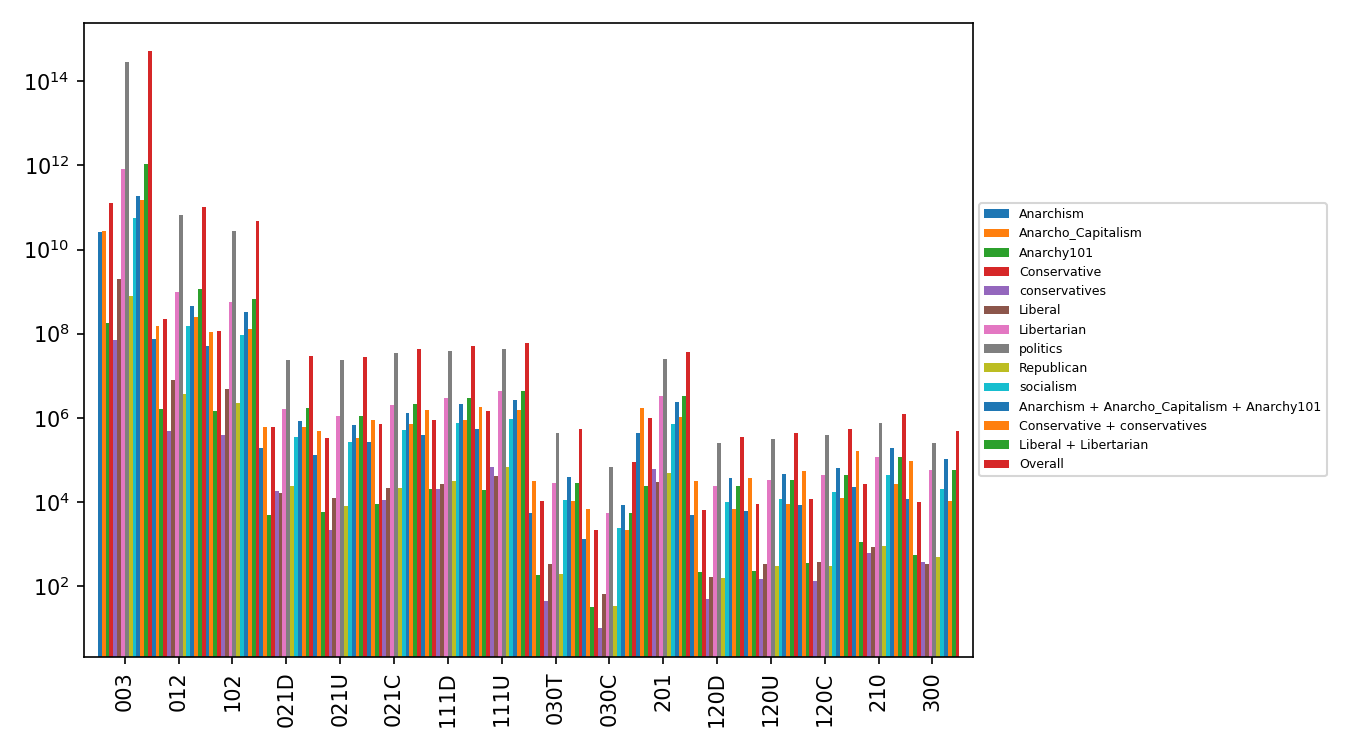

In [44]:
df.transpose().plot(kind='bar', stacked=False, width=1, logy=True, figsize=(9,5), legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

## Weighted Average

In [45]:
average = df.divide(df.sum(axis=1), axis=0).dot(dims)
print(average)

                                            transitivity     equality  \
Anarchism                                    6.75566e-06   0.00697127   
Anarcho_Capitalism                            4.5882e-05     0.014224   
Anarchy101                                   4.48907e-05    0.0256307   
Conservative                                 1.47317e-06   0.00352779   
conservatives                                6.46386e-05    0.0232014   
Liberal                                      3.19794e-06   0.00896227   
Libertarian                                  1.07733e-06   0.00265087   
politics                                     2.00236e-08  0.000428378   
Republican                                    8.9776e-06    0.0108215   
socialism                                     5.6435e-06   0.00607909   
Anarchism + Anarcho_Capitalism + Anarchy101  7.74636e-06   0.00599296   
Conservative + conservatives                 1.31878e-06   0.00336399   
Liberal + Libertarian                        8.0251

## Weighted Average Plot
Note that the *Overall* weighted average may be similar to the *politics* weighted average in the 3 dimensions because *politics* data makes up a disporportionately large percentage of *Overall* data. Compared to other subreddits, *politics* had by far the most nodes and edges.

<IPython.core.display.Javascript object>


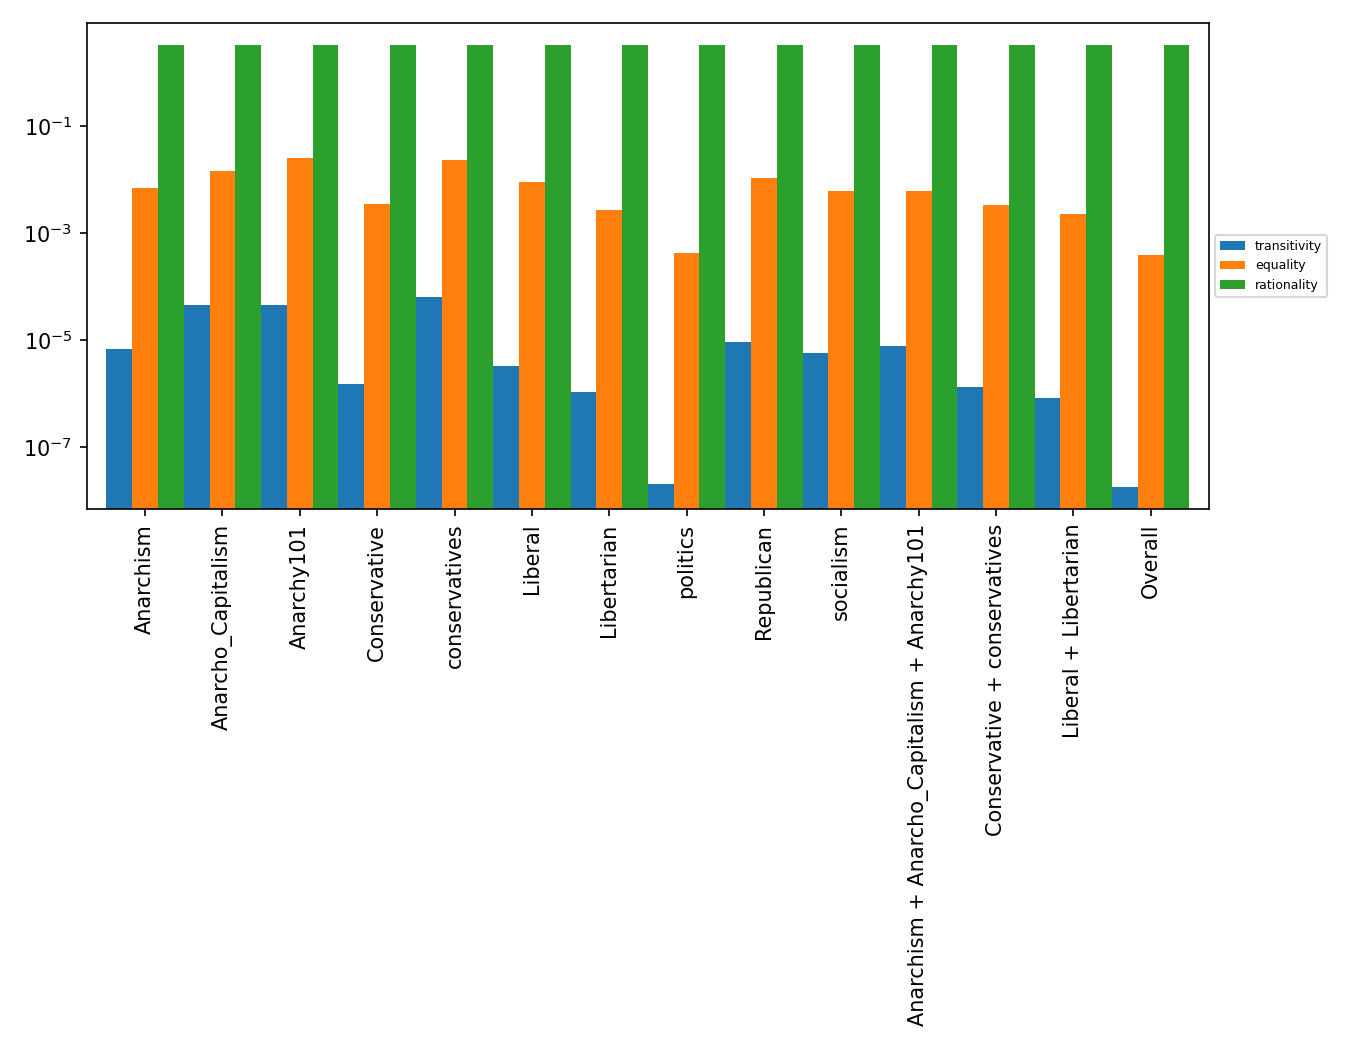

In [46]:
average.plot(kind='bar', stacked=False, width=1, logy=True, figsize=(9,7), legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


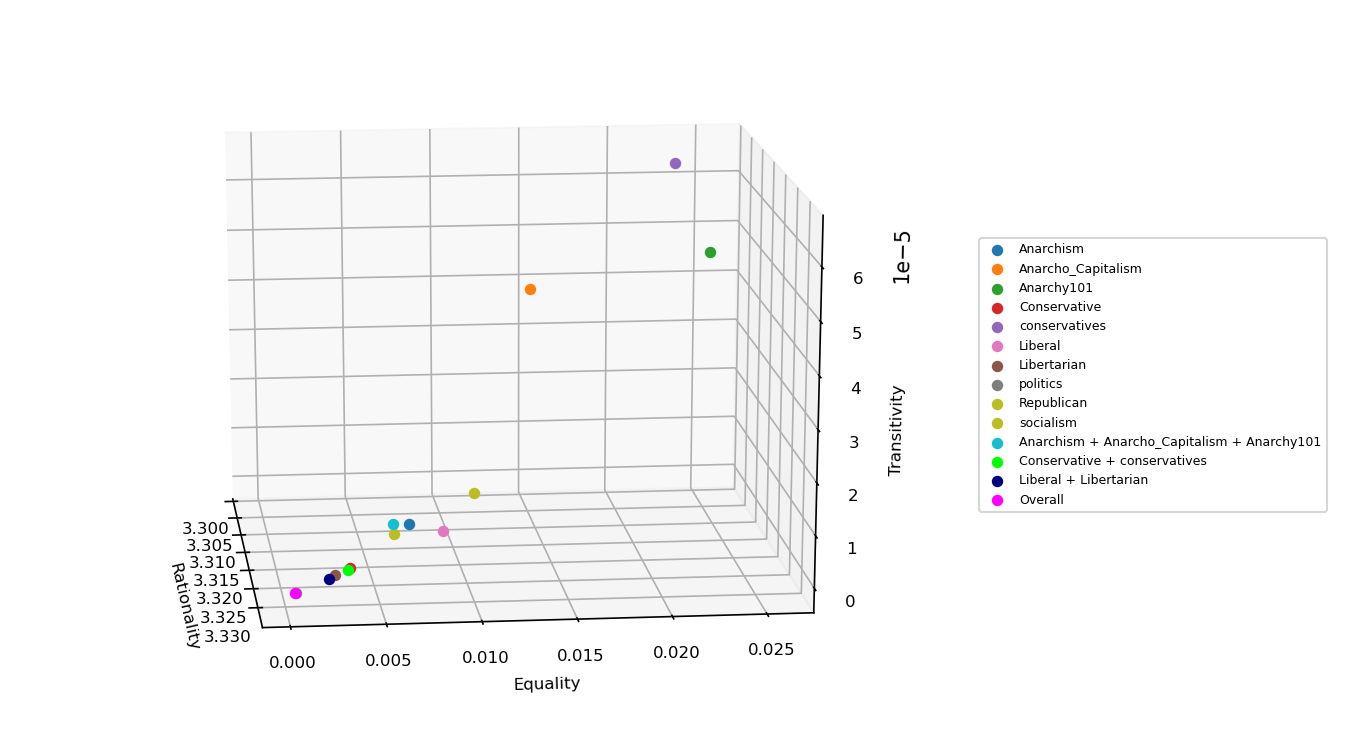

In [57]:
plot = plt.figure(figsize=(9, 5)).gca(projection='3d')
index = 0
for name, row in average.iterrows():
    plot.scatter(row['rationality'], row['equality'], row['transitivity'], label=name, c=colours[index])
    index += 1
plot.set_xlabel('Rationality', fontsize=8)
plot.set_ylabel('Equality', fontsize=8)
plot.set_zlabel('Transitivity', fontsize=8)
plot.tick_params(axis='both', labelsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 6})
plt.tight_layout()
plt.show()

## Notes

* Todo: statistical significane (p-value)
* Dataset: William L. Hamilton*, Justine Zhang*, Cristian Danescu-Niculescu-Mizil, Dan Jurafsky, Jure Leskovec. Loyalty in Online Communities. (Currently under review at WWW 2017). *Equal contribution. http://snap.stanford.edu/data/web-RedditNetworks.html